In [1]:
import cv2
import numpy as np

#load image
mnist = cv2.imread('../datasets/digits.png', 0)

#image width, height in pixels
#print(mnist.shape)

images = [np.hsplit(row, 100)
         for row in np.vsplit(mnist, 50)
         ]
images = np.array(images, dtype=np.float32)
print('images', images.shape)

#split into train/test
train_features = images[:, :50].reshape(-1, (20 * 20))
print('train_features', train_features.shape)

#split into train/test
test_features = images[:, 50:100].reshape(-1, (20*20))
print('test_features', test_features.shape)

#create labels
#arange from 0-9 exclusive of 10
k = np.arange(10)
train_labels = np.repeat(k, 250).reshape(-1, 1)
test_labels = train_labels.copy()
print('train_labels', train_labels.shape)

#create kNN model
knn = cv2.ml.KNearest_create()

#train the kNN model
knn.train(train_features, cv2.ml.ROW_SAMPLE, train_labels)

#use k = 3
ret, result, neighbors, dist = knn.findNearest(test_features, 3)

#check if the results are correct
matches = np.equal(result, test_labels)

#convert bool to int
matches = matches.astype(np.int)

#count correct predictions
correct = np.count_nonzero(matches)

#compute the accuracy
accuracy = (correct * 100.00) / result.size

#display test accuracy
print('Accuracy: {}', format(accuracy))

images (50, 100, 20, 20)
train_features (2500, 400)
test_features (2500, 400)
train_labels (2500, 1)
Accuracy: {} 91.64


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#load image
mnist = cv2.imread('../datasets/fashion.png',0)

#shape is in the form of (y,x)
print(mnist.shape)

#get region of interest by splitting the images
images = np.array([np.hsplit(row,30) for row in np.vsplit(mnist,30)], dtype=np.float32)
print(images.shape)

plt.imshow(images[0,22],cmap="gray")

#split images to get half of the image as train then the rest for test
train_features = images[:, :15].reshape(-1,(28*28))

#split the remaining for test
test_feature = images[:, 15:30].reshape(-1,(28 * 28))

print(train_features.shape)

#create labels | k = classes | 
k = np.arange(10)
train_labels = np.repeat(k,45).reshape(-1, 1)
test_labels = train_labels.copy()

#create kNN Model
knn = cv2.ml.KNearest_create()

#train the kNN Model
knn.train(train_features, cv2.ml.ROW_SAMPLE,train_labels)

#using the trained model
ret,result,neighbors, dist = knn.findNearest(test_feature,3)

#check accuracy
matches = np.equal(result,test_labels)
matches = matches.astype(np.int)
correct = np.count_nonzero(matches)
accuracy = (correct * 100.00)/result.size

print(accuracy)

(840, 840)
(30, 30, 28, 28)
(450, 784)
70.88888888888889


(840, 840)
(30, 30, 28, 28)
(450, 784)
74.66666666666667


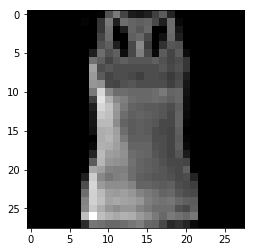

In [2]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
#load image
mnist = cv2.imread('../datasets/fashion.png',0)
#shape is in the form of (y,x)
print(mnist.shape)
#get region of interest by splitting the images
images = np.array([np.hsplit(row,30) for row in np.vsplit(mnist,30)], dtype=np.float32)
print(images.shape)
plt.imshow(images[0,22],cmap="gray")
#split images to get half of the image as train then the rest for test
train_features = images[:, :15].reshape(-1,(28*28))

#split the remaining for test
test_features = images[:, 15:30].reshape(-1,(28 * 28))
print(train_features.shape)
#create labels | k = classes | 
k = np.arange(10)
train_labels = np.repeat(k,45).reshape(-1, 1)
test_labels = train_labels.copy()
model = cv2.ml.SVM_create()
model.setKernel(cv2.ml.SVM_LINEAR)
model.setC(2.67)
model.setGamma(5.383)
model.setType(cv2.ml.SVM_C_SVC)
model.train(train_features, cv2.ml.ROW_SAMPLE, train_labels)
result = model.predict(test_features)
#check accuracy
matches = np.equal(result[1],test_labels)
matches = matches.astype(np.int)
correct = np.count_nonzero(matches)
accuracy = (correct * 100.00)/result[1].size
print(accuracy)   

In [ ]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
#load image
mnist = cv2.imread('../datasets/fashion.png',0)
#shape is in the form of (y,x)
print(mnist.shape)
#get region of interest by splitting the images
images = np.array([np.hsplit(row,30) for row in np.vsplit(mnist,30)], dtype=np.float32)
print(images.shape)
plt.imshow(images[0,22],cmap="gray")
#split images to get half of the image as train then the rest for test
#train_features = images[:, :15].reshape(-1,(28*28))

#split the remaining for test
#test_features = images[:, 15:30].reshape(-1,(28 * 28))
print(train_features.shape)

#mean normalization
train_features -= np.mean(train_features, axis=0)
test_features -= np.mean(train_features, axis=0)

#create labels | k = classes | 
k = np.arange(10)
train_labels = np.repeat(k,45).reshape(-1, 1)
test_labels = train_labels.copy()
model = cv2.ml.SVM_create()
model.setKernel(cv2.ml.SVM_LINEAR)
model.setC(2.67)
model.setGamma(5.383)
model.setType(cv2.ml.SVM_C_SVC)
model.train(train_features, cv2.ml.ROW_SAMPLE, train_labels)
result = model.predict(test_features)
#check accuracy
matches = np.equal(result[1],test_labels)
matches = matches.astype(np.int)
correct = np.count_nonzero(matches)
accuracy = (correct * 100.00)/result[1].size
print(accuracy)   

(1000, 2000)
(50, 100, 20, 20)


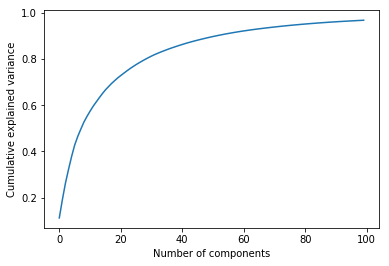

Accuray PCA: 92.24


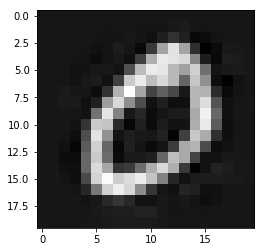

In [12]:
from sklearn.decomposition import PCA
import cv2
import numpy as np
import matplotlib.pyplot as plt


mnist = cv2.imread('../datasets/digits.png', 0)
print(mnist.shape)
images = np.array([np.hsplit(row, 100) for row in np.vsplit(mnist, 50)], dtype=np.float32)
print(images.shape)

pca = PCA(n_components=images.shape[1])



pca = PCA(n_components=100)
train_features = images[:, :50].reshape(-1, (20* 20))
test_features = images[:, 50:100].reshape(-1, (20* 20))
pca.fit(train_features)
train_features = pca.transform(train_features)
test_features = pca.transform(test_features)
train_features.shape, test_features.shape

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

inverse_pca = pca.inverse_transform(train_features)
inverse_pca.shape
plt.imshow(inverse_pca[0].reshape(20,20), cmap='gray')

k = np.arange(10)
train_labels = np.repeat(k, 250).reshape(-1, 1)
test_labels = train_labels.copy()
knn = cv2.ml.KNearest_create()
knn.train(train_features, cv2.ml.ROW_SAMPLE, train_labels)
ret, result, neighbors, dist = knn.findNearest(test_features, 3)
matches = np.equal(result, test_labels)
matches = matches.astype(np.int)
correct = np.count_nonzero(matches)
accuray = (correct * 100.00) / result.size
print('Accuray PCA: {}'.format(accuray)) 